In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from numpy.polynomial import Polynomial

In [2]:
# basic rule for calculating the difference, implanted in the lambda function.
# You may use it if you wish
difference = lambda y2, y1, x2, x1: (y2-y1)/(x2-x1)

def calc_div_diff(x,y):
    assert(len(x)==len(y))
    #write this function to calculate all the divided differences in the list 'b'
    n = len(x)
    b = np.zeros((n,n))
    b[:,0] = y
    #initializing
    #----------------------------------------------
    # YOUR CODE HERE
    #raise NotImplementedError()
    for col in range(1, n):
        for row in range(0,n-col):
            num = b[row+1, col-1]-b[row, col-1]
            den = x[row+col]-x[row]
            b[row][col] = num / den
    #----------------------------------------------
    return b[0]

In [3]:
class Newtons_Divided_Differences:

    def __init__(self, differences, data_x):
        self.differences = differences
        self.data_x = data_x

    def n(self, k, x):

        result = 1
        #----------------------------------------------
        # YOUR CODE HERE
        result = 1
        for i in range(0, k):
            result *= x - self.data_x[i]
        #raise NotImplementedError()
        #----------------------------------------------

        return result

    def __call__(self, x):
        '''
        this function is for calculating y from given x using all the difference coefficients
        x can be a single value or a numpy
        the formula being used:
        f(x) = f [x0] + (x-x0) f[x0,x1] + (x-x0) (x-x1) f[x0,x1,x2] + . . . + (x-x0) (x-x1) . . . (x-xk-1) f[x0, x1, . . ., xk]

        work on this after implementing 'calc_div_diff'. Then you should have
        f[x0], f[x0,x1]. . . . . ., f[x0, x1, . . ., xk] stored in self.differences

        'res' variable must return all the results (corresponding y for x)
        '''

        res = np.zeros(len(x)) #Initialization to avoid runtime error. You can change this line if you wish

        #----------------------------------------------
        # YOUR CODE HERE
        #raise NotImplementedError()
        for k in range(len(self.data_x)):
            term = self.differences[k] * self.n(k, x)
            res += term
        #----------------------------------------------

        return res


p([0.25]) = 1.1634920731214105


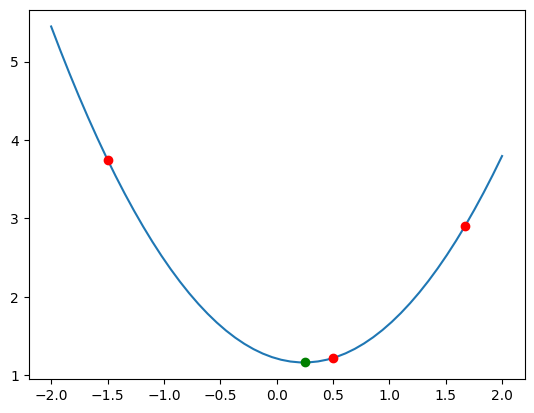

In [4]:

data_x = np.array([-1.5, 0.5, 1.67])
data_y = np.array([3.75, 1.22, 2.9])

differences = calc_div_diff(list(data_x), list(data_y))


p = Newtons_Divided_Differences(list(differences), data_x)

x_target = [0.25]
y_target = p(x_target)
print(f"p({x_target}) = ", end = "")
print(*y_target)

plot_x = np.linspace(-2, 2, 50)
plot_y = p(plot_x)

m = x_target[0]
n = y_target[0]



plt.plot(plot_x, plot_y)
plt.plot(data_x, data_y, 'ro')
plt.plot(m,n, 'go')
plt.show()
